# Analyzing Customer Churn Using Credit Card Dataset

[Dataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)

##1 Introduction

### 1.1 Dataset Overview

- Entries: 10,127 customers are represented in the dataset.
- Columns: 23 features are included, covering customer details and behavior.
- Missing Values: No missing data in the dataset.
- Data Types: A mix of numerical and categorical variables.
- Target Variable: 'Attrition_Flag' indicates customer churn.

### 1.2 Goal

The project aims to use machine learning models like Logistic Regression and Neural Networks to accurately predict and understand customer churn in the credit card industry. The insights gained will inform customer retention strategies and pave the way for future research.

###1.3 Load The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/drive/MyDrive/Colab Notebooks/BankChurners.csv"
df = pd.read_csv(path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## 2 Exploratory Data Analysis

### 2.1 Data Overview

The dataset consists of 23 variables, including a mix of 20 numerical and 3 categorical attributes, spanning 10,127 observations. Presented below is a succinct overview of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

**Categorical Columns: 6**
- `Attrition_Flag` : Internal event (customer activity) variable - if the account is closed then 1 else 0
- `Gender` : M=Male, F=Female
- `Education_Level` : Educational Qualification of the account holder
- `Marital_Status` : Married, Single, Divorced, Unknown
- `Income_Category` : Annual Income Category of the account holder
- `Card_Category` : Type of Card (Blue, Silver, Gold, Platinum)

**Numerical Columns: 17**
- `CLIENTNUM` : Client Number
- `Customer_Age` : Customer's Age
- `Dependent_count` : Number of dependents
- `Months_on_book` : Period of relationship with bank
- `Total_Relationship_Count` : Total no. of products held by the customer
- `Months_Inactive_12_mon` : No. of months inactive in the last 12 months
- `Contacts_Count_12_mon` : No. of Contacts in the last 12 months
- `Credit_Limit` : Credit Limit on the Credit Card
- `Total_Revolving_Bal` : Total Revolving Balance on the Credit Card
- `Avg_Open_To_Buy` : Open to Buy Credit Line (Average of last 12 months)
- `Total_Amt_Chng_Q4_Q1` : Change in Transaction Amount (Q4 over Q1)
- `Total_Trans_Amt` : Total Transaction Amount (Last 12 months)
- `Total_Trans_Ct` : Total Transaction Count (Last 12 months)
- `Total_Ct_Chng_Q4_Q1` : Change in Transaction Count (Q4 over Q1)
- `Avg_Utilization_Ratio` : Average Card Utilization Ratio
- `Naive_Bayes_Classifier...` (two columns)

In [ ]:
# Dropping the Naive_Bayes_Class columns as they are not essential for our EDA
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

In [ ]:
missing_values = df.isnull().sum()

print("Missing Values in the Entire DataFrame:")
print(missing_values)

Missing Values in the Entire DataFrame:
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


- We've verified that there are no missing values.

### 2.2 Visualization
- Initial histograms for numerical attributes like 'Customer_Age' were followed by bar charts for categories such as 'Gender'. Heatmaps were used lastly to assess feature correlations.

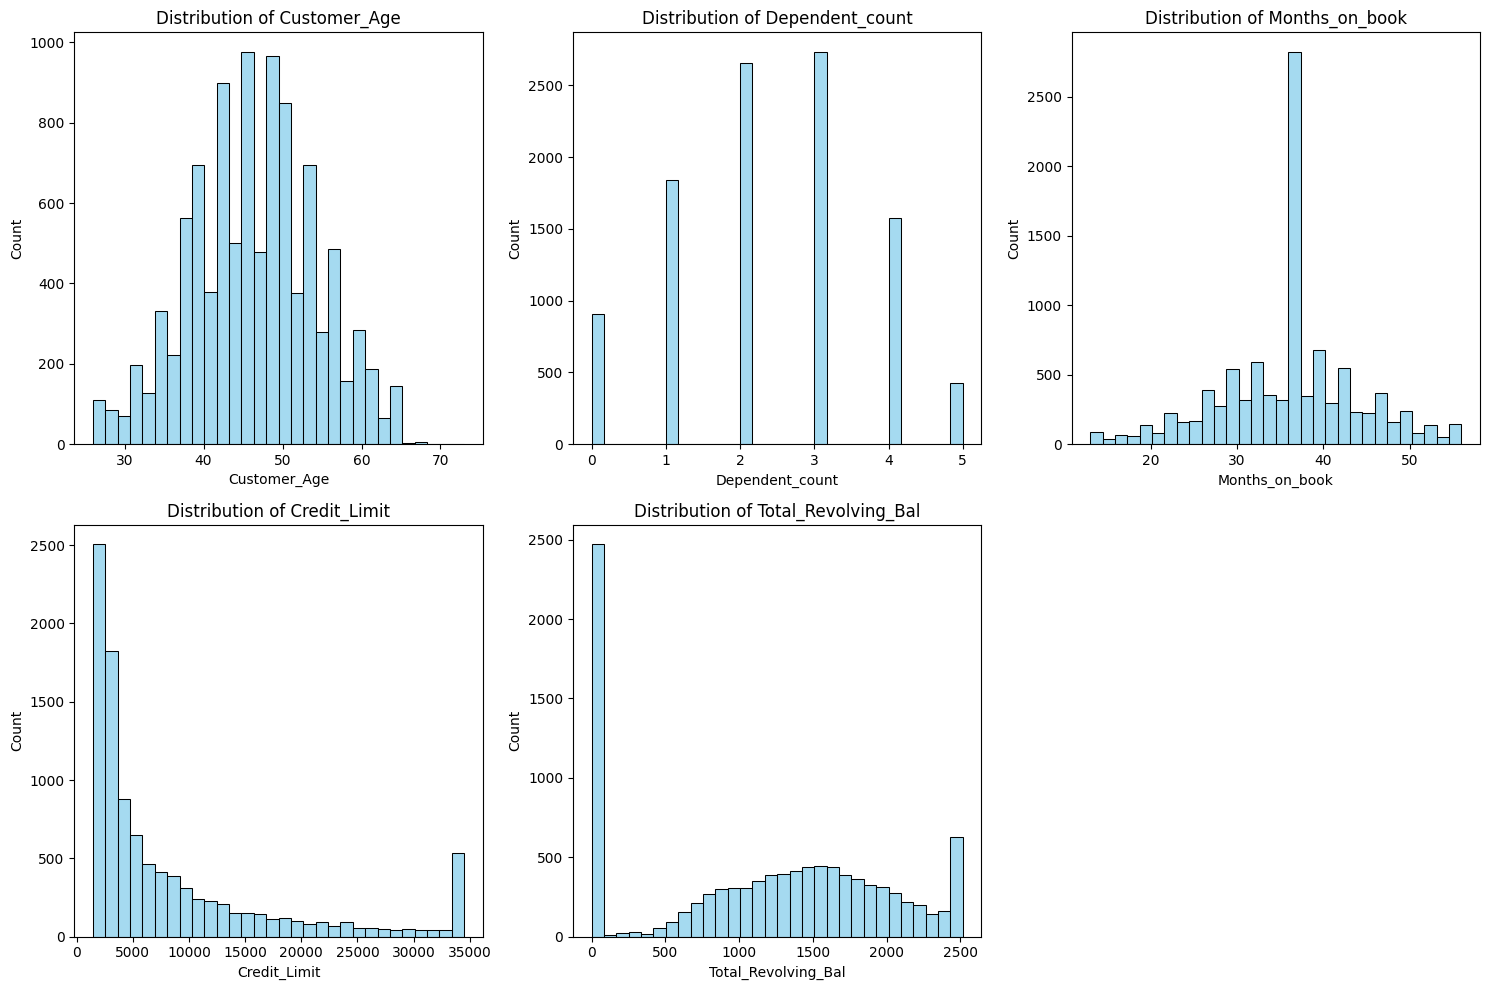

In [ ]:
selected_numerical_columns = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Credit_Limit',
    'Total_Revolving_Bal'
]

# Plotting the distribution of selected numerical columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(selected_numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

- **Customer_Age**: Appears to be normally distributed around the age of 45-50.
- **Dependent_count**: Most customers have between 2 and 4 dependents.
- **Months_on_book**: The majority of customers have been with the bank for around 35-40 months.
- **Credit_Limit**: Most customers have a credit limit below 10,000.
- **Total_Revolving_Bal**: This feature also seems to have a right-skewed distribution.


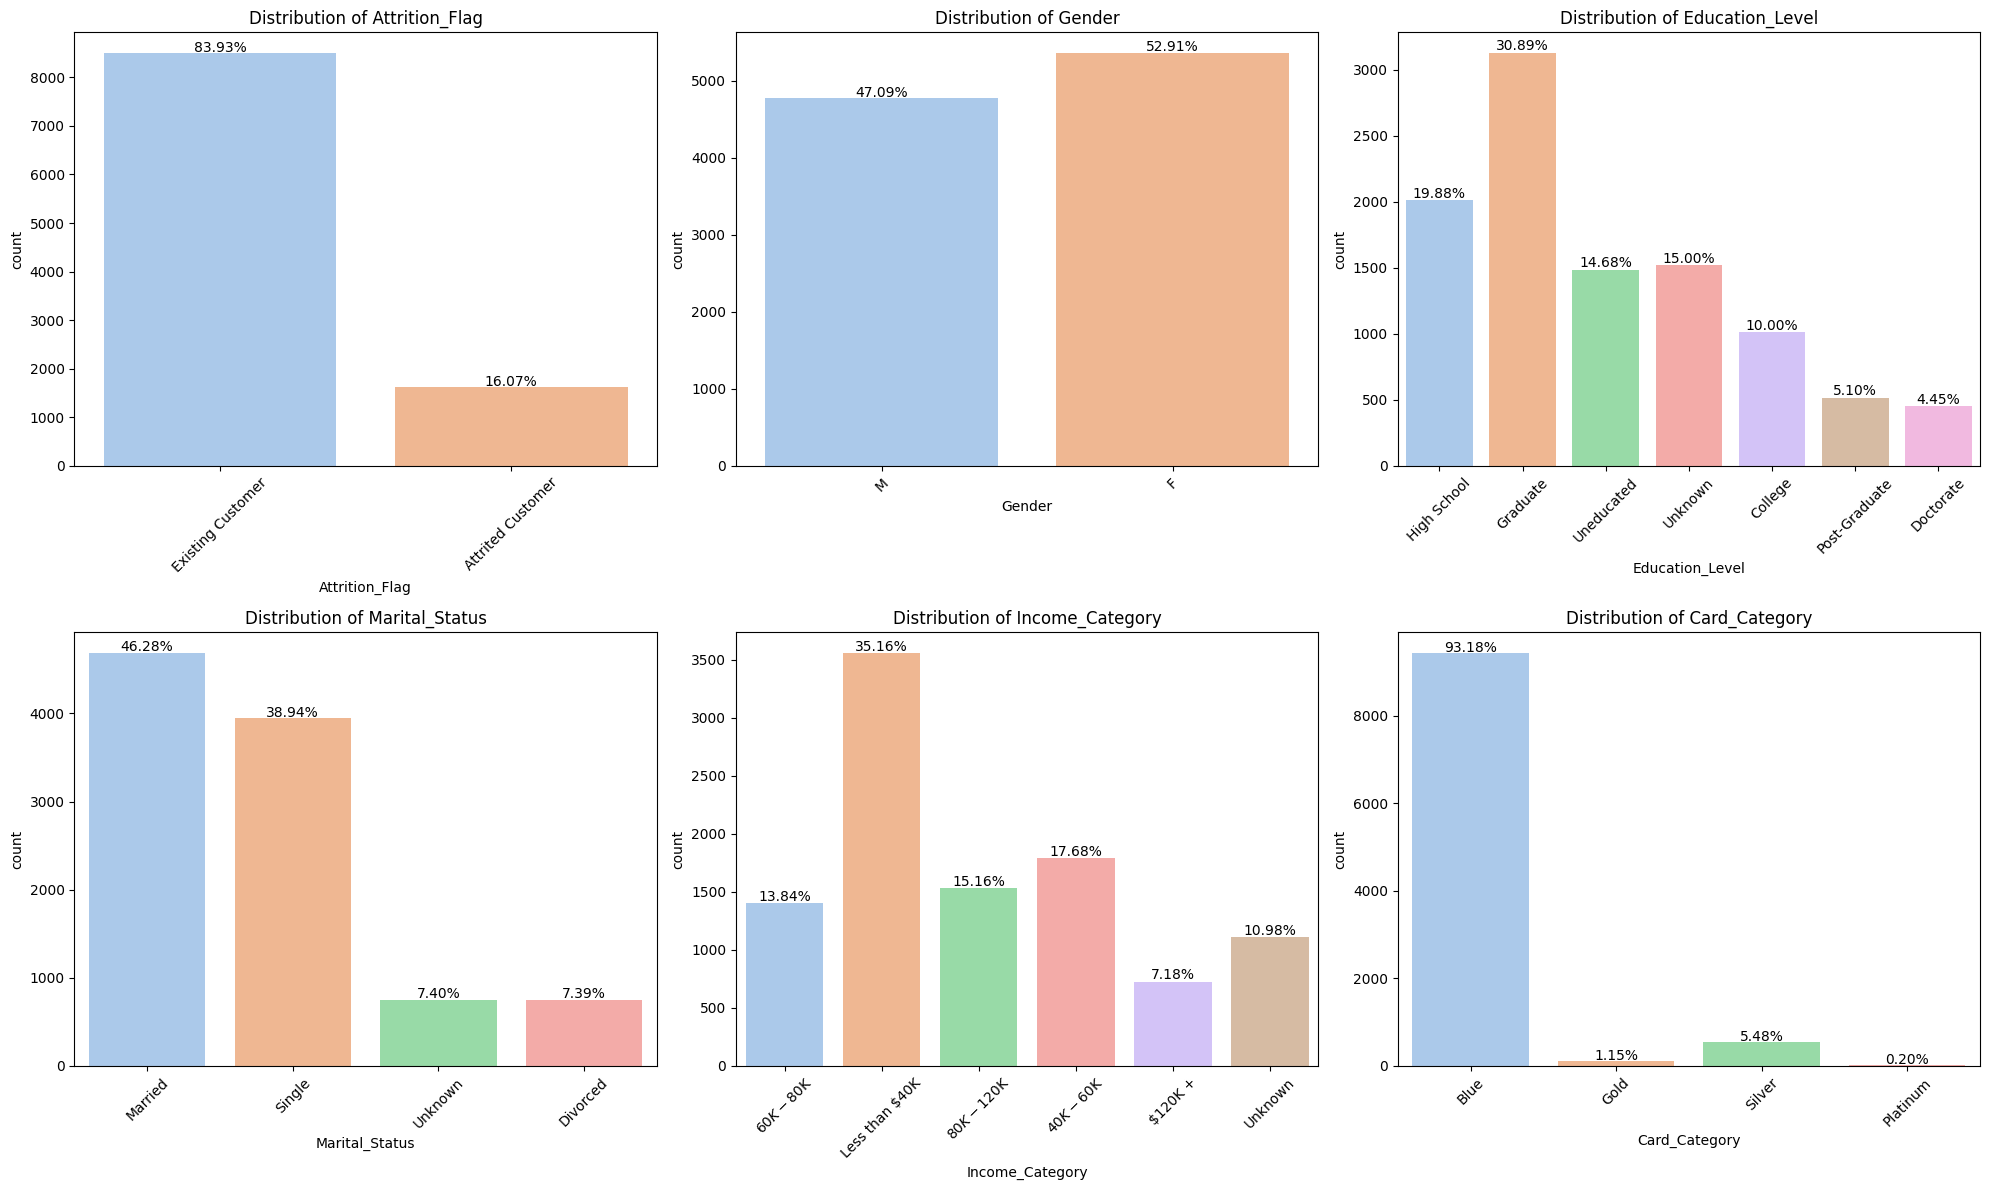

In [ ]:
selected_categorical_columns = [
    'Attrition_Flag',
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]
plt.figure(figsize=(20, 12))

for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(2, 3, i)
    ax = sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

    total_count = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 20,
                '{:1.2f}%'.format((height / total_count) * 100),
                ha="center")

plt.tight_layout()
plt.show()

- **Attrition_Flag**: About 84% of customers are 'Existing', while approximately 16% are 'Attrited'.

- **Gender**: Approximately 53% are females, and 47% are males.

- **Education_Level**: About 31% of customers are 'Graduate', followed by other education levels, each constituting a smaller proportion.

- **Marital_Status**: Around 47% of customers are married, followed by 'Single' at 39% and 'Unknown' at 7%.

- **Income_Category**: Roughly 35% of customers earn 'Less than $40K', followed by '$40K - $60K' at about 18%.

- **Card_Category**: Nearly 93% of customers have a 'Blue' card.

>The Attrition_Flag column shows a class imbalance: 84% 'Existing' and 16% 'Attrited'. This could skew analysis and would need attention if predicting churn.

<ipython-input-39-fbb31f5914f5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_filtered = df_filtered.corr()


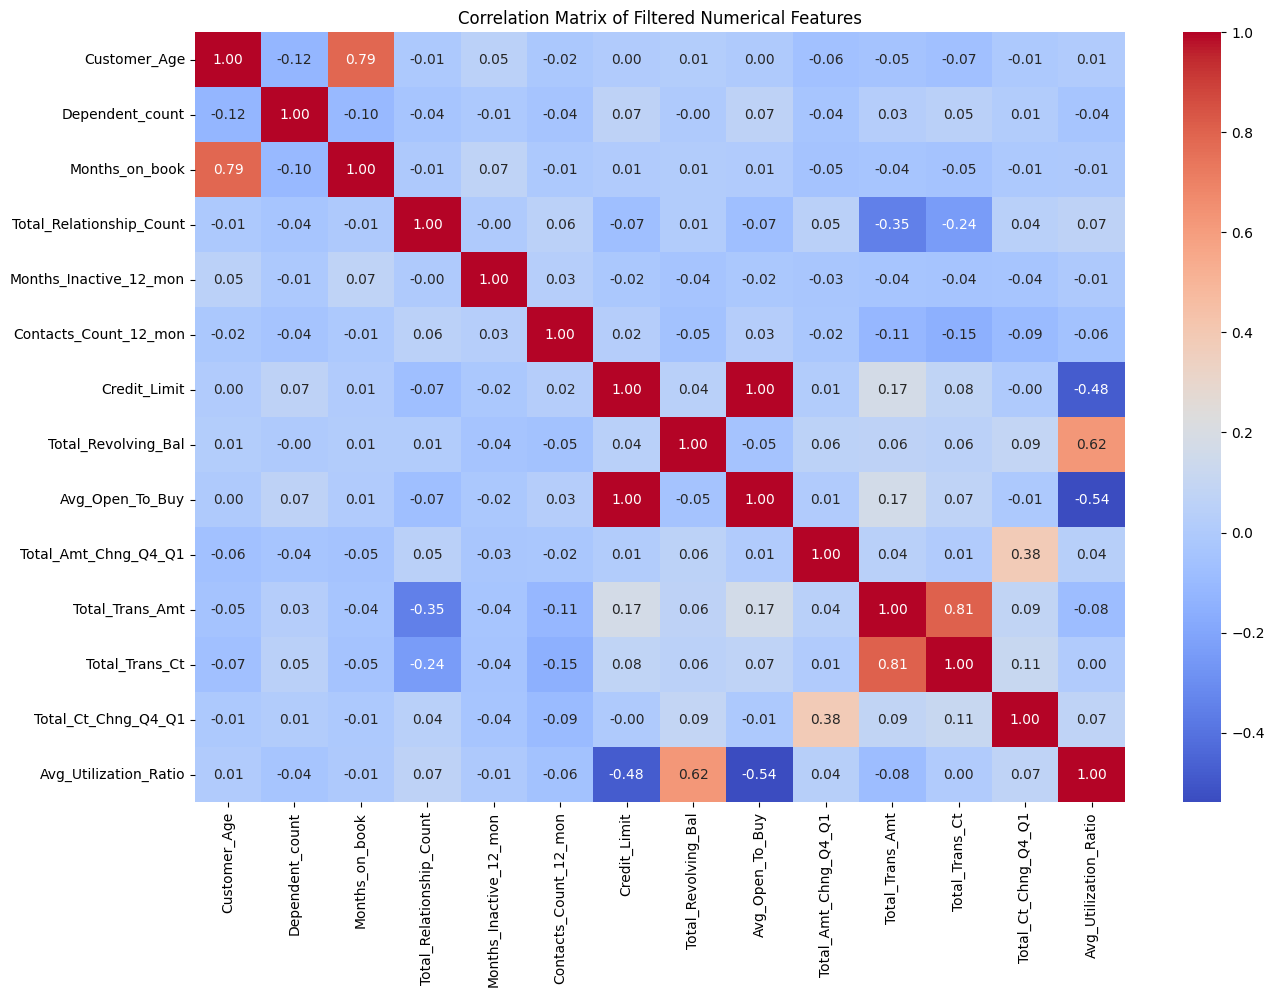

In [ ]:
# Dropping the 'CLIENTNUM' column which is an identifier and not useful for correlation analysis
df_filtered = df.drop(['CLIENTNUM'], axis=1)

correlation_matrix_filtered = df_filtered.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Filtered Numerical Features")
plt.show()

**Positve Association**

>**Customer_Age and Months_on_book (r = 0.79):**
- High correlation, but not necessarily indicative of loyalty. Older customers generally have longer tenures with the bank, but this doesn't imply greater satisfaction or loyalty.

>**Total_Revolving_Bal and Avg_Utilization_Ratio (r = 0.62):**
- Customers with higher revolving balances are likely to have higher utilization ratios, which could be an area for targeted financial advice.
- Attrited customers may have low balances due to clearing debts or dissatisfaction before leaving the bank.


**Negative Association**

>**Credit_Limit vs Avg_Utilization_Ratio (r = -0.48):**
- Customers with high credit limits may be financially stable or credit-score conscious. Target for premium or investment services.

>**Customer_Age and Avg_Utilization_Ratio (r = -0.54):**
- Older customers may use less credit due to financial stability or retirement planning. Good candidates for tailored financial advice.

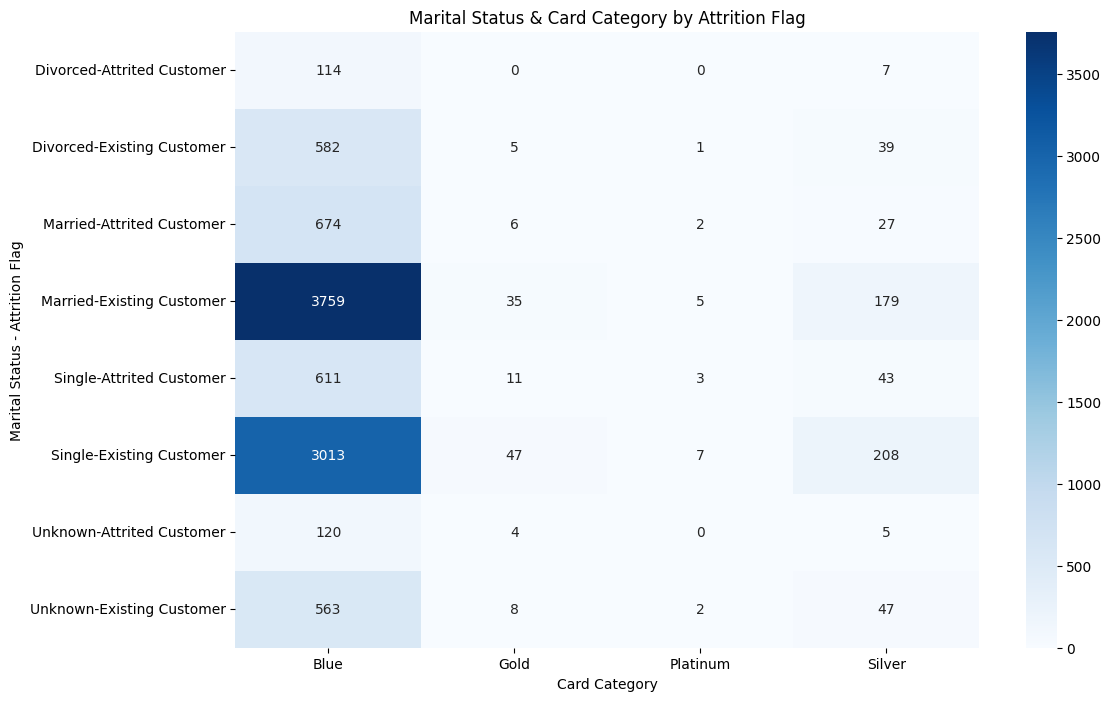

In [ ]:
cross_table = pd.crosstab(index=[df['Marital_Status'], df['Attrition_Flag']], columns=df['Card_Category'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_table, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Card Category')
plt.ylabel('Marital Status - Attrition Flag')
plt.title('Marital Status & Card Category by Attrition Flag')
plt.show()

* This heatmap will provide a visual representation of how "Marital_Status," "Card_Category," and "Attrition_Flag" are related in your dataset.

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(index=[df['Marital_Status'], df['Attrition_Flag']], columns=df['Card_Category'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p)

Chi-squared statistic: 42.44041099219327
p-value: 0.003702627253731095


* p<0.05: there is a significant association between card category and marital status



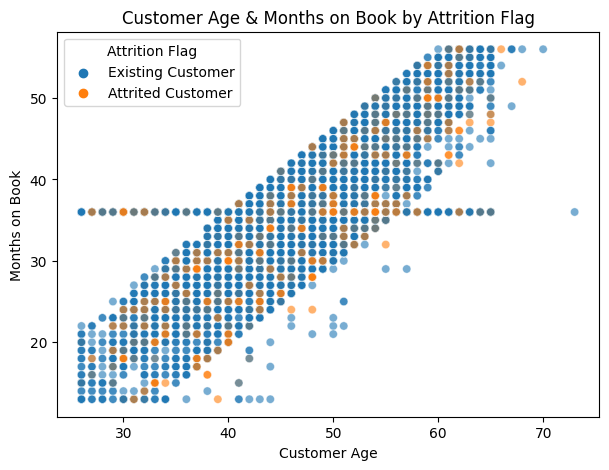

In [ ]:
# Customer Age & Months on Book

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', alpha=0.6)
plt.xlabel('Customer Age')
plt.ylabel('Months on Book')
plt.title('Customer Age & Months on Book by Attrition Flag')
plt.legend(title='Attrition Flag')
plt.show()

**Customer_Age and Months_on_book (r = 0.79):**

- High correlation, but not necessarily indicative of loyalty. Older customers generally have longer tenures with the bank, but this doesn't imply greater satisfaction or loyalty.

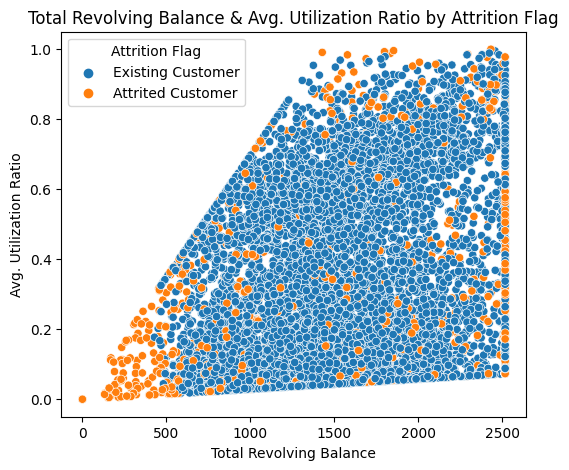

In [ ]:
# Total Revolving Balance & Average Card Utilization Ratio

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', hue='Attrition_Flag')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Avg. Utilization Ratio')
plt.title('Total Revolving Balance & Avg. Utilization Ratio by Attrition Flag')
plt.legend(title='Attrition Flag')
plt.show()

**Total_Revolving_Bal and Avg_Utilization_Ratio (r = 0.62):**

- Customers with higher revolving balances are likely to have higher utilization ratios, which could be an area for targeted financial advice.

- Attrited customers may have low balances due to clearing debts or dissatisfaction before leaving the bank.



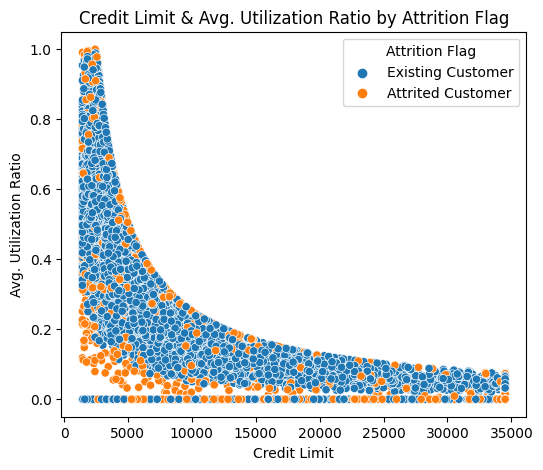

In [ ]:
# Credit_Limit vs Avg_Utilization_Ratio, colored by Attrition Flag

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag')
plt.xlabel('Credit Limit')
plt.ylabel('Avg. Utilization Ratio')
plt.title('Credit Limit & Avg. Utilization Ratio by Attrition Flag')
plt.legend(title='Attrition Flag')
plt.show()

**Credit_Limit and Avg_Utilization_Ratio (r = -0.48):**

- Customers with high credit limits may be financially stable or credit-score conscious. Target for premium or investment services.

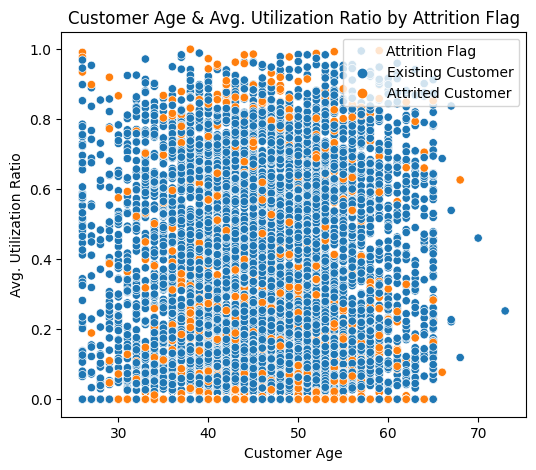

In [ ]:
# Customer_Age vs Avg_Utilization_Ratio, colored by Attrition Flag

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Customer_Age', y='Avg_Utilization_Ratio', hue='Attrition_Flag')
plt.xlabel('Customer Age')
plt.ylabel('Avg. Utilization Ratio')
plt.title('Customer Age & Avg. Utilization Ratio by Attrition Flag')
plt.legend(title='Attrition Flag')
plt.show()

**Customer_Age and Avg_Utilization_Ratio (r = -0.54):**

- Older customers may use less credit due to financial stability or retirement planning. Good candidates for tailored financial advice.

- As you can see the scatter plot, there is no specific linear pattern so Pearson correlation could be biased.

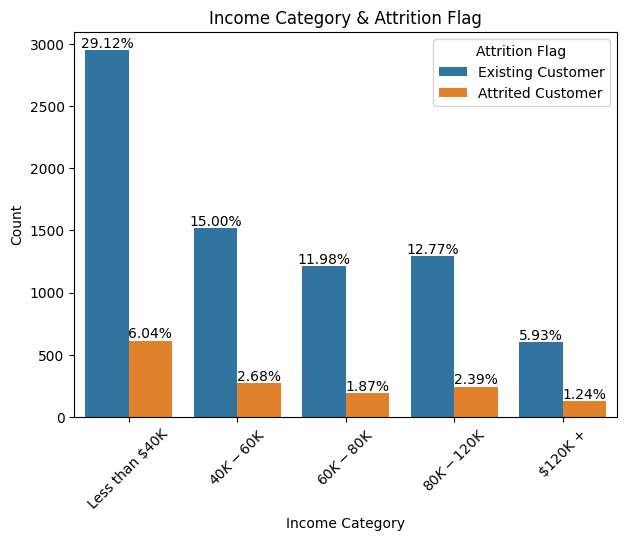

In [ ]:
income_order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag', order=income_order)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Income Category & Attrition Flag')
plt.legend(title='Attrition Flag')
plt.xticks(rotation=45)

total_counts = len(df)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


- Higher attrition rates are observed in the "Less than $40K" and "$40K - $60K" income categories, indicating a need for targeted retention strategies in these segments.


## 3 Data Preprocessing

### 3.1 Standard Scaling

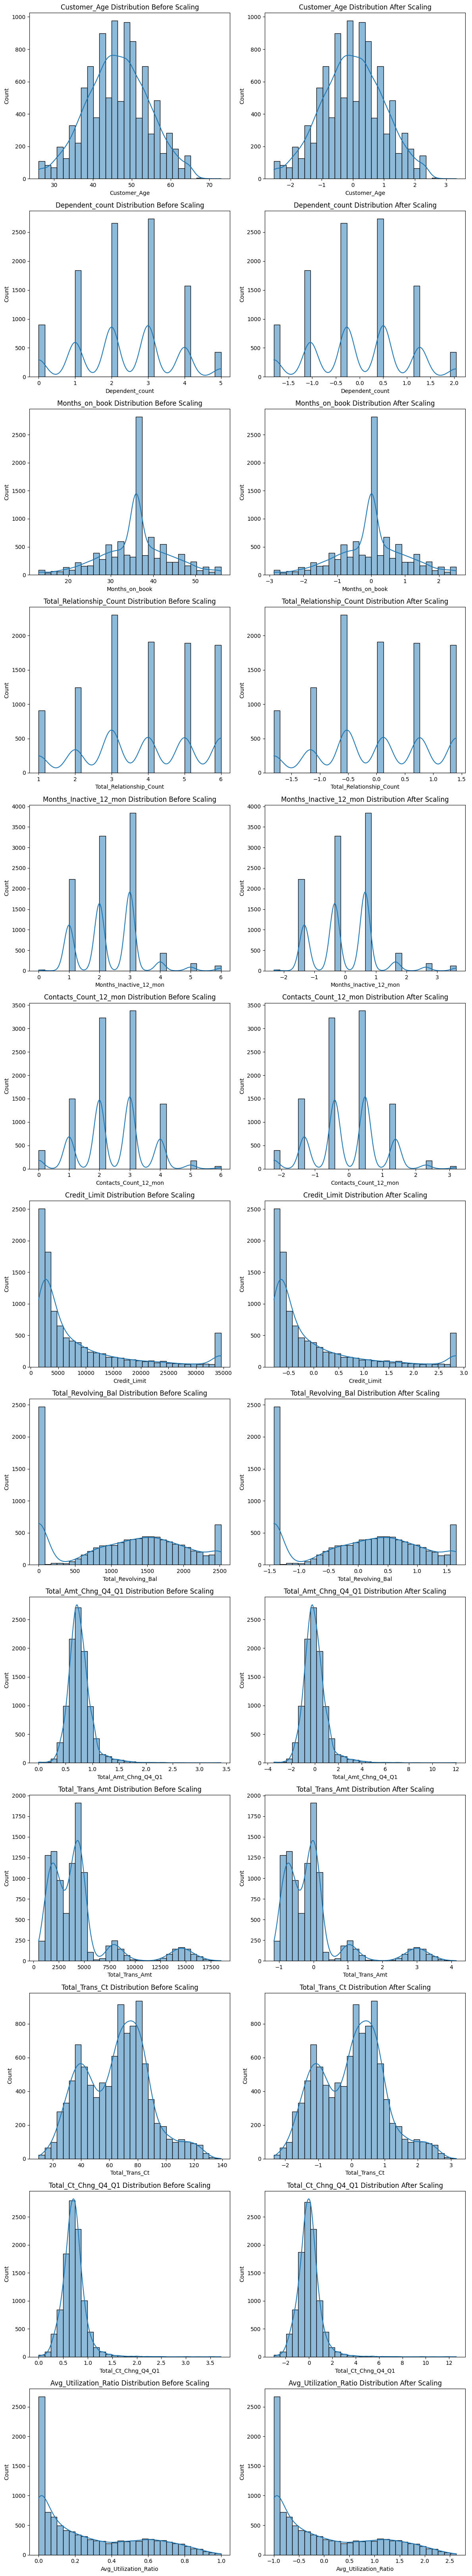

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the list of numerical column names, including 'Credit_Limit'
numerical_columns = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[numerical_columns])

df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns)

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 5 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Plot the distribution before scaling
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Distribution Before Scaling')

    # Plot the distribution after scaling
    sns.histplot(df_scaled[col], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Distribution After Scaling')

plt.tight_layout()
plt.show()


* Scaling numerical variables standardizes their range, allowing for equal contribution to machine learning models and satisfying algorithm assumptions.

### 3.2 Category to Numeric Conversion

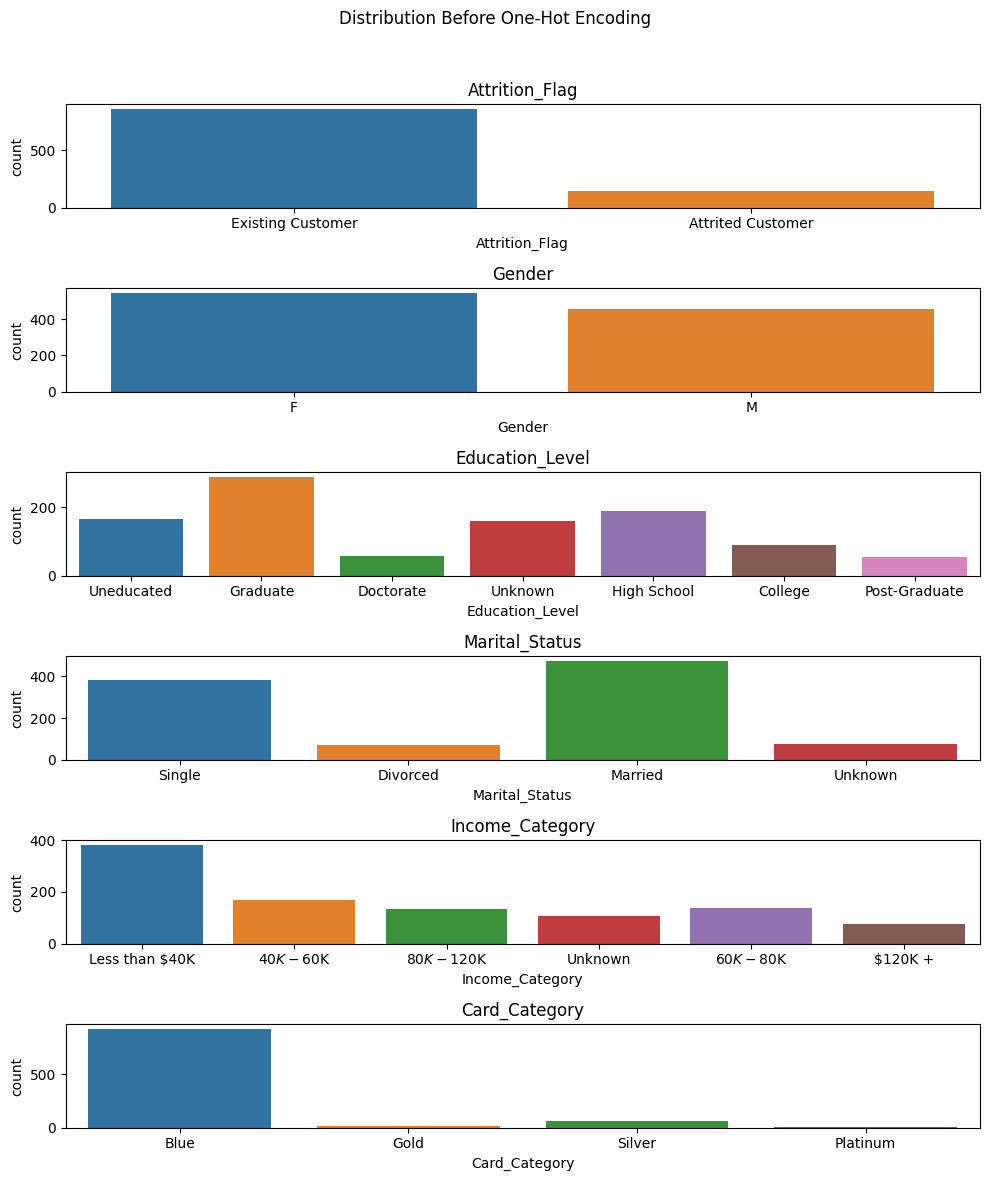

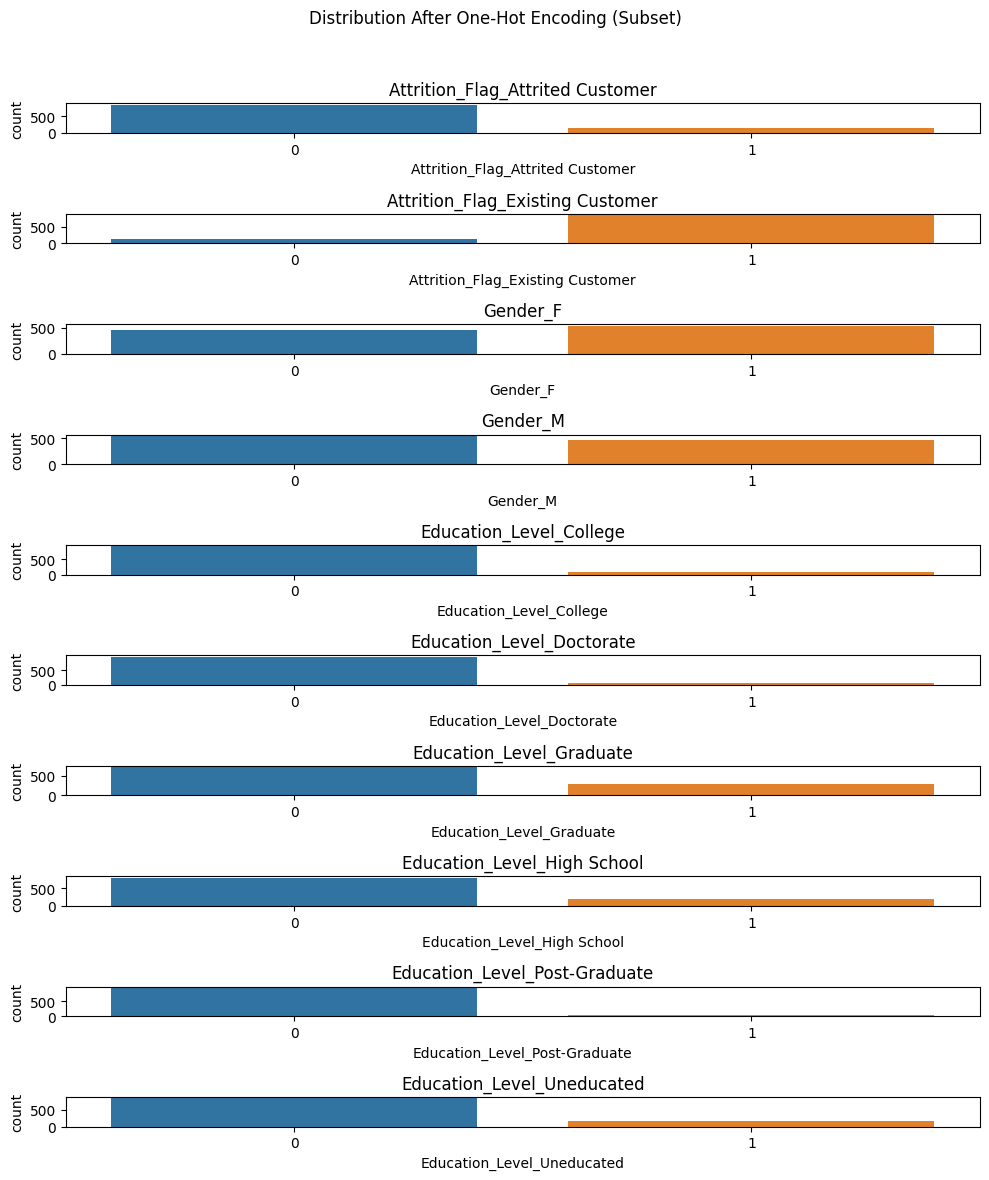

In [ ]:
nominal_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

df_onehot = pd.get_dummies(df[nominal_columns])

subset_nominal = df[nominal_columns].sample(1000, random_state=42)
subset_onehot = df_onehot.sample(1000, random_state=42)

fig, axes = plt.subplots(len(nominal_columns), 1, figsize=(10, 12))
fig.suptitle('Distribution Before One-Hot Encoding')
for i, col in enumerate(nominal_columns):
    sns.countplot(data=subset_nominal, x=col, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

selected_onehot_columns = subset_onehot.columns[:10]
fig, axes = plt.subplots(len(selected_onehot_columns), 1, figsize=(10, 12))
fig.suptitle('Distribution After One-Hot Encoding (Subset)')
for i, col in enumerate(selected_onehot_columns):
    sns.countplot(data=subset_onehot, x=col, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- Encoding categorical variables transforms them into a numerical format, making them compatible with machine learning algorithms(Neural Network) while preserving their categorical nature.

### 3.3 Data Splitting: Training and Testing Sets


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

X = df_onehot.drop('Attrition_Flag_Existing Customer', axis=1)
y = df_onehot['Attrition_Flag_Existing Customer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_test_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

model_nn = Sequential()
model_nn.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_nn = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

nn_test_loss, nn_test_accuracy = model_nn.evaluate(X_test, y_test)

Epoch 1/50
203/203 [==============================] - 1s 2ms/step - loss: 0.4892 - accuracy: 0.7968 - val_loss: 0.3522 - val_accuracy: 0.8532
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8369 - val_loss: 0.2526 - val_accuracy: 0.8544
Epoch 3/50
203/203 [==============================] - 0s 1ms/step - loss: 0.2069 - accuracy: 0.9090 - val_loss: 0.1388 - val_accuracy: 0.9790
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9977 - val_loss: 0.0707 - val_accuracy: 1.0000
Epoch 5/50
203/203 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 6/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 7/50
203/203 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 

- Data splitting divides the dataset into training and testing sets for model training and evaluation, ensuring the model's effectiveness on new data.






## 4 Modeling

### 4.1 Logistic Regression Modeling and Evaluation


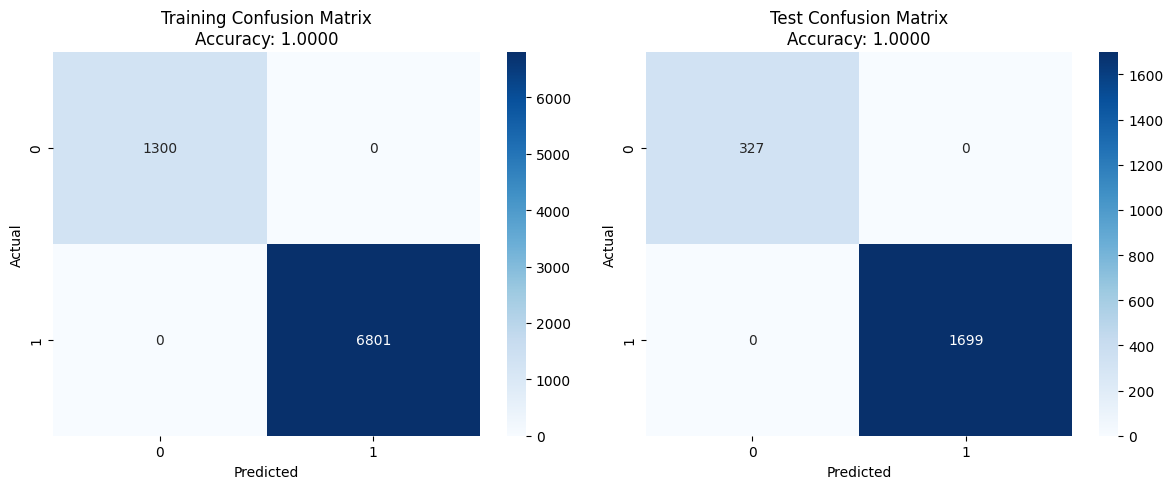

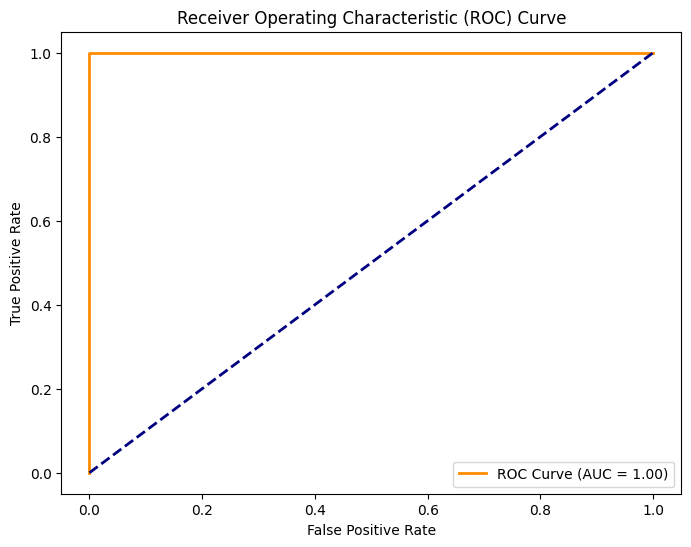

In [ ]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Training Confusion Matrix\nAccuracy: {accuracy_train:.4f}')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Test Confusion Matrix\nAccuracy: {accuracy_test:.4f}')

plt.tight_layout()
plt.show()

y_test_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

- The confusion matrix for the Logistic Regression model reveals how well the model predicts actual churn cases. The accuracy score quantifies the model's overall performance.

- The model has a relatively high accuracy, suggesting it is capable of distinguishing between churn and non-churn instances effectively. This makes it a strong candidate for deployment in customer retention strategies.


### 4.2 Neural Network Model


Epoch 1/50
203/203 [==============================] - 1s 4ms/step - loss: 0.3880 - accuracy: 0.8366 - val_loss: 0.2763 - val_accuracy: 0.8575
Epoch 2/50
203/203 [==============================] - 1s 3ms/step - loss: 0.2204 - accuracy: 0.8869 - val_loss: 0.1451 - val_accuracy: 0.9667
Epoch 3/50
203/203 [==============================] - 1s 3ms/step - loss: 0.1123 - accuracy: 0.9921 - val_loss: 0.0742 - val_accuracy: 1.0000
Epoch 4/50
203/203 [==============================] - 1s 3ms/step - loss: 0.0585 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 6/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 7/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 

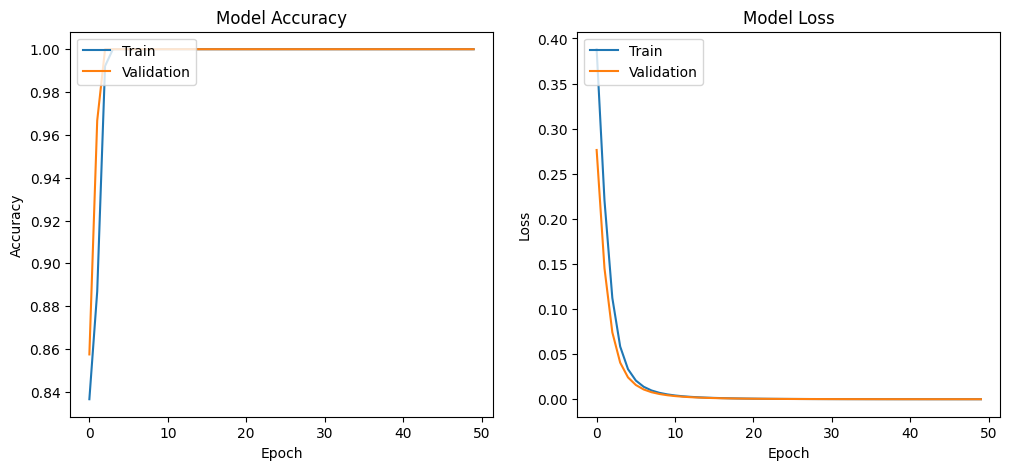

In [ ]:
neural_network_model = Sequential()
neural_network_model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
neural_network_model.add(Dense(1, activation='sigmoid'))

neural_network_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = neural_network_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = neural_network_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

- Model Accuracy: Tracks model performance. Rising curve shows learning; plateau or decline suggests overfitting.

- Model Loss: Displays error levels. Declining curve means learning; a rise in validation loss signals overfitting.

- Graphs reveal model learning and overfitting risk. Rising accuracy and falling loss indicate effective learning; diverging training and validation metrics flag overfitting.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    return sensitivity, specificity

# Logistic Regression Evaluation
y_test_pred_lr = log_reg.predict(X_test)
y_test_prob_lr = log_reg.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
auc_lr = roc_auc_score(y_test, y_test_prob_lr)
sensitivity_lr, specificity_lr = calculate_sensitivity_specificity(y_test, y_test_pred_lr)
f1_lr = classification_report(y_test, y_test_pred_lr, output_dict=True)['weighted avg']['f1-score']

# Neural Network Evaluation
y_test_pred_nn = (model_nn.predict(X_test) > 0.5).astype('int32')
y_test_prob_nn = model_nn.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
auc_nn = roc_auc_score(y_test, y_test_prob_nn)
sensitivity_nn, specificity_nn = calculate_sensitivity_specificity(y_test, y_test_pred_nn)
f1_nn = classification_report(y_test, y_test_pred_nn, output_dict=True)['weighted avg']['f1-score']

# Creating a DataFrame to display metrics
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "AUC", "Sensitivity", "Specificity", "F1-Score"],
    "Logistic Regression": [accuracy_lr, auc_lr, sensitivity_lr, specificity_lr, f1_lr],
    "Neural Network": [accuracy_nn, auc_nn, sensitivity_nn, specificity_nn, f1_nn]
})

metrics_df.set_index("Metric", inplace=True)
metrics_df

64/64 [==============================] - 0s 1ms/step


,Logistic Regression,Neural Network
Metric,,
Accuracy,1.0,1.0
AUC,1.0,1.0
Sensitivity,1.0,1.0
Specificity,1.0,1.0
F1-Score,1.0,1.0


## 5 Result


**Key Findings:**
- Experimented with various machine learning models including Logistic Regression and Neural Networks.
- Achieved high accuracy rates, with Neural Networks demonstrating the most promising results.
- Conducted extensive Exploratory Data Analysis to identify key features impacting customer churn.

**Limitations:**
- The dataset is imbalanced with a higher number of non-churn instances, which could potentially skew the model's predictions.
- Limited feature engineering was performed, leaving room for further optimization.

**Future Directions:**
- Investigate advanced resampling techniques to handle the imbalanced data.
- Experiment with hyperparameter tuning to optimize model performance.
- Consider deploying the best-performing model into a real-world business setting to evaluate its practical impact.